In [2]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from tqdm import trange

import Setup as p
from Likelihood import Model

In [3]:
cuts_def = p.load_pickle("../../Data/SMmatching/logMScuts_def.p")
cuts_def

{0.5: 9.473257810423036, 0.7: 8.990324401288419, 0.9: 8.245922134925959}

In [4]:
perccat = float(0.5)
model_05 = Model(cuts_def[perccat], perccat, generator=False)
perccat = float(0.7)
model_07 = Model(cuts_def[perccat], perccat, generator=False)

In [5]:
Nalpha = 15
Nscatter = 15

alphas = np.linspace(p.min_alpha, p.max_alpha, Nalpha)
scatters = np.linspace(p.min_scatter, p.max_scatter, Nscatter)

alpha_grid, scatter_grid = np.meshgrid(alphas, scatters)
lp_grid05 = np.zeros(shape=(Nalpha, Nscatter))
lp_grid07 = np.zeros(shape=(Nalpha, Nscatter))

In [6]:
print("Computing the grid..")
k = 0
for i in range(Nalpha):
    for j in range(Nscatter):
        alpha = alpha_grid[i, j]
        scatter = scatter_grid[i, j]
        theta = (alpha, scatter)
        lp_grid05[i, j] = model_05.loglikelihood(theta)
        lp_grid07[i, j] = model_07.loglikelihood(theta)

Computing the grid..


In [10]:
lp_grid = lp_grid05+lp_grid07
# lp_grid = np.exp(lp_grid)
# lp_grid = lp_grid/np.sum(lp_grid)

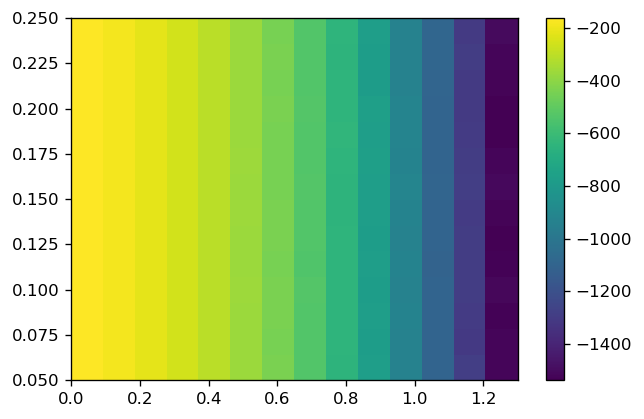

In [13]:
plt.figure(dpi=120)
plt.pcolor(alpha_grid, scatter_grid, lp_grid)
plt.colorbar()
plt.show()

In [66]:
data = p.load_pickle("../../Data/SMmatching/Train_stoch_covmats_0.5_.p")
cut50 = p.load_pickle("../../Data/SMmatching/Obs_CF_SMcut_0.5_.p")

alpha_grid = data['alpha']
scatter_grid= data['scatter']
wp = data['wp']
covmat = data['covmat']

def get_wp_covmat(alpha, scatter):
    xi = np.abs(np.unique(alpha_grid)-alpha).argmin()
    yi = np.abs(np.unique(scatter_grid)-scatter).argmin()
    return wp[yi, xi], covmat[yi, xi, :, :]

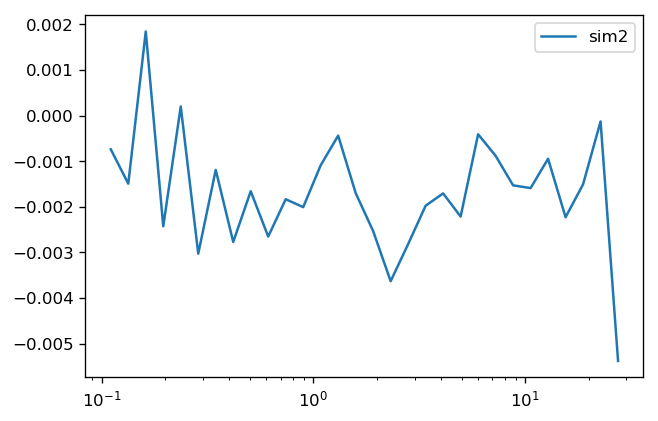

In [85]:
alpha = 0.0
scatter = 0.05

CFsim, CVsim = get_wp_covmat(alpha, scatter)
std = np.sqrt(np.diagonal(CVsim))
x = cut50['cbins']

CFsim2, CVsim2 = get_wp_covmat(alpha, 0.25)
std2 = np.sqrt(np.diagonal(CVsim2))

plt.figure(dpi=120)
# plt.errorbar(x, CFsim, std, capsize=3.0, label='sim')
# plt.errorbar(x, CFsim2, std2, capsize=3.0, label='sim2')
plt.errorbar(x, 1-CFsim/CFsim2, label='sim2')
# plt.errorbar(x,cut50['mean_wp'], np.sqrt(np.diagonal(cut50['covmap_wp'])), label='obs. data', capsize=3.0)
# plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

In [86]:
data = p.load_pickle("../../Data/SMmatching/Train_stoch_covmats_0.5_.p")

In [102]:
alpha = data['alpha']
scatter = data['scatter']
covmat = data['covmat']
wp = data['wp']


alpha_unique = alpha[0, :]
scatter_unique = scatter[:, 0]



a = 1.3
s= 0.0

xi = np.abs(alpha_unique-a).argmin()
yi = np.abs(scatter_unique-s).argmin()

alpha[yi, xi], scatter[yi, xi]

wp[yi, xi]

array([ 710.78393399,  651.24064821,  585.94921927,  526.88088505,
        472.50474332,  418.72597958,  368.2974137 ,  321.8143527 ,
        278.95896727,  237.77158443,  200.50240685,  166.27538   ,
        136.9547108 ,  112.01315882,   90.84923227,   74.39927198,
         61.07716709,   51.19345779,   43.39562048,   36.90595199,
         31.76470955,   26.87782629,   22.47471087,   19.6201977 ,
         16.92645631,   13.63147906,   10.67446515,    8.24246751,
          5.99989562,    4.0869548 ])

In [30]:
alpha = 0.5
scatter = 0.17
# np.sum(np.abs(get_wp(alpha, scatter)-obswp))
get_wp(alpha, scatter)

array([ 367.43099422,  328.58394444,  289.99958238,  255.96483764,
        227.16318354,  200.62821866,  176.29696746,  156.12690179,
        137.23570468,  119.50825584,  104.01960235,   89.0728204 ,
         76.05945842,   64.85324356,   55.24070733,   47.17052928,
         40.0545371 ,   34.33930389,   29.6897813 ,   25.45976547,
         21.99455498,   18.7905868 ,   15.88034562,   13.74233251,
         11.63720027,    9.36151141,    7.36512459,    5.61706827,
          4.03317509,    2.71293052])

In [1]:
theta = (alpha, scatter)
model_05.loglikelihood(theta)

NameError: name 'alpha' is not defined

In [ ]:
data = p.load_pickle("../../Data/Grid_search.p")

In [ ]:
def sigma_int(x, s):
    return 1 - np.exp(-(x/s)**2/2)

In [ ]:
sigma1 = sigma_int(1, 1)
sigma2 = sigma_int(2, 1)
sigma3 = sigma_int(3, 1)

In [ ]:
sigma1, sigma2, sigma3

In [ ]:
alpha_grid = data['alpha']
scatter_grid = data['scatter']
ll_grid = data['loglikelihood']
ll_grid = np.exp(ll_grid)
ll_grid = ll_grid/np.sum(ll_grid)



In [ ]:
alpha_grid[:, 0]

In [ ]:
alpha_unique = np.unique(alpha_grid)
scatter_unique = np.unique(scatter_grid)
def find_nearest_prob(alpha, scatter):
    xi = np.abs(alpha_unique-alpha).argmin()
    yi = np.abs(scatter_unique-scatter).argmin()
    return ll_grid[yi, xi]
    

In [ ]:
scat_alpha = list()
scat_scatter = list()
i = 0
while True:
    a = np.random.uniform(low=0.0, high=1.25, size=1)[0]
    s = np.random.uniform(low=0.0, high=0.3, size=1)[0]
    rand_prob = np.random.uniform(size=1)
    point_prob = find_nearest_prob(a, s)
    if point_prob > rand_prob:
        scat_alpha.append(a)
        scat_scatter.append(s)
        i += 1
    if i > 100000:
        break
scat_alpha = np.array(scat_alpha)
scat_scatter = np.array(scat_scatter)

In [ ]:
plt.figure(dpi=120)
plt.scatter(scat_alpha, scat_scatter, s=0.001, c='red')
plt.ylim(0, 0.3)
plt.xlim(0, 1.25)
plt.show()

In [ ]:
plt.rcParams['font.serif']='Times New Roman' # Text font
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.size']=12
plt.rcParams['text.usetex']=True
plt.rcParams['mathtext.fontset']='cm' #Computer Modern font
plt.rcParams['figure.dpi'] = 240
figwidth=3.4 # PRD column width in inches
aspect = 0.75 # Aspect ratio
figheight = aspect*figwidth
plt.rcParams['figure.figsize'] = (figwidth, figheight)

X = np.vstack([scat_alpha, scat_scatter]).T
figure = corner.corner(X, bins=35, range=[(0.0, 1.25), (0.0, 0.3)], labels=[r"$\alpha$", r"$\sigma [\mathrm{dex}]$"],
                       show_titles=True, title_kwargs={"fontsize": 12}, levels=[sigma1, sigma2, sigma3],
                      quantiles=(0.16, 0.84))
plt.tight_layout()
plt.savefig("../../Plots/corner.pdf")

In [ ]:
confidence_grid = np.zeros((25, 25))

z = np.ravel(ll_grid)
res = 0
IDS = np.flip(np.argsort(z), axis=-1)
for i in IDS:
    res += z[IDS][i]
    if res < 0.39346934028736658:
        ii, jj = np.unravel_index(i, (25, 25))
        confidence_grid[ii, jj] = 4
    
    if 0.39346934028736658 < res < 0.8646647167633873:
        ii, jj = np.unravel_index(i, (25, 25))
        confidence_grid[ii, jj] = 3
    
    if 0.8646647167633873 < res < 0.98889100346175773:
        ii, jj = np.unravel_index(i, (25, 25))
        confidence_grid[ii, jj] = 2
        
    if 0.98889100346175773 < res < 0.99999627334682795:
        ii, jj = np.unravel_index(i, (25, 25))
        confidence_grid[ii, jj] = 2
        
        
        

In [ ]:
plt.figure(dpi=180, figsize=(4, 3))
plt.rcParams.update({'font.size': 6})
# [-2, -1, -0.5, -0.25, 0]
plt.contourf(alpha_grid, scatter_grid, ll_grid)
plt.colorbar()
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\sigma$")
plt.title("Normalised evaluated on a grid")
plt.savefig("../../Plots/grid.pdf")
plt.show()

In [ ]:
1.25/25